In [2]:
import warnings
import joblib
import pydotplus
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, validation_curve
from skompiler import skompile

In [4]:
pd.set_option("display.max_columns", None)
warnings.simplefilter(action="ignore", category=Warning)

### ilk iki adımı aynı veri seti olduğu için (diabet) es geçtik diğerlerinden de bakabilirsin.

##########################################################################
# 3. Modeling using CART
##########################################################################

In [5]:
df = pd.read_csv("DATA/diabetes.csv")

In [6]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [7]:
y = df["Outcome"]

In [8]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [10]:
X = df.drop(["Outcome"], axis = 1)

In [11]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [12]:
cart_model = DecisionTreeClassifier(random_state=1).fit(X, y)

In [16]:
### karmaşıklık matrisi için y_pred bulunur
y_pred = cart_model.predict(X)

In [17]:
y_pred

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [19]:
y_prob = cart_model.predict_proba(X)[:, 1]

In [20]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       500
           1       1.00      1.00      1.00       268

    accuracy                           1.00       768
   macro avg       1.00      1.00      1.00       768
weighted avg       1.00      1.00      1.00       768



### bu kadar iyi tahmin sonuçları verilmesi normal değildir.

In [11]:
### AUC DEĞERİ
roc_auc_score(y, y_prob)

1.0

#############################################################################################
# Holdout Yöntemi ile Başarı Değerlendirme
#############################################################################################

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

In [22]:
cart_model = DecisionTreeClassifier(random_state=17).fit(X_train, y_train)

In [23]:
### Train hatası
y_pred = cart_model.predict(X_train)

In [24]:
y_prob = cart_model.predict_proba(X_train)[:, 1]

In [25]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       350
           1       1.00      1.00      1.00       187

    accuracy                           1.00       537
   macro avg       1.00      1.00      1.00       537
weighted avg       1.00      1.00      1.00       537



In [26]:
roc_auc_score(y_train, y_prob)

1.0

In [27]:
### Test hatası
y_pred = cart_model.predict(X_test)

In [28]:
y_prob = cart_model.predict_proba(X_test)[:, 1]

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.78      0.77       150
           1       0.58      0.57      0.57        81

    accuracy                           0.71       231
   macro avg       0.68      0.67      0.67       231
weighted avg       0.70      0.71      0.70       231



In [30]:
roc_auc_score(y_test, y_prob)

0.6739506172839506

In [28]:
### model eğitildiği veride çok iyi performans verip görmedği veride ise performansı düşmüştür. overfitting oldu eğitildiği veriyi çok iyi öğrenmiştir.

In [30]:
#### random_state değerini değiştirince sonuçların da değiştiği gözlemlenir yani farklı değerler seçlince sonuçlar da değişir.

####################################################################
# CV ile başarı değerlendirme
#####################################################################

In [22]:
cart_model = DecisionTreeClassifier(random_state=17).fit(X, y)

In [23]:
cv_results = cross_validate(cart_model,
                            X,y,
                            cv=5,
                            scoring=["accuracy", "f1", "roc_auc"])

In [24]:
cv_results["test_accuracy"].mean()

0.7058568882098294

In [25]:
cv_results["test_f1"].mean()

0.5710621194523633

In [26]:
cv_results["test_roc_auc"].mean()

0.6719440950384347

##########################################################################
# Hiperparametre Optimizasyonu
#########################################################################

In [27]:
cart_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 17,
 'splitter': 'best'}

In [28]:
cart_params = {"max_depth": range(1, 11),
               "min_samples_split": range(2, 20)}

In [29]:
cart_best_grid = GridSearchCV(cart_model,
                              cart_params,
                              n_jobs=-1,
                              verbose=1).fit(X, y)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


In [30]:
cart_best_grid.best_params_

{'max_depth': 5, 'min_samples_split': 4}

In [31]:
cart_best_grid.best_score_

0.7500806383159324

In [32]:
# en iyi maksimum derinlik

In [33]:
random = X.sample(1, random_state=45)

In [34]:
cart_best_grid.predict(random)

array([1], dtype=int64)

In [35]:
# GridSearchCV  = en iyi parametreleri vermek için kullanılan bir methoddur. ve en son final modeli fit edilmelidir.

#########################################################################
# FINAL MODEL
#########################################################################

In [37]:
cart_final = DecisionTreeClassifier(**cart_best_grid.best_params_, random_state=17).fit(X, y)

In [38]:
cart_final.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 17,
 'splitter': 'best'}

In [39]:
cart_final = cart_model.set_params(**cart_best_grid.best_params_).fit(X, y)

In [40]:
cart_final.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 17,
 'splitter': 'best'}

In [41]:
cv_results = cross_validate(cart_model,
                            X,y,
                            cv=5,
                            scoring=["accuracy", "f1", "roc_auc"])

In [42]:
cv_results["test_accuracy"].mean()

0.7500806383159324

In [43]:
cv_results["test_f1"].mean()

0.614625004082526

In [44]:
cv_results["test_roc_auc"].mean()

0.797796645702306

In [45]:
# bunlar yeni değerlerimiz yani hiperparametre optimizasyonu sonrası yükselmiş. başarılı bir şekilde tamamlanmış modelleri en iyi şekilde en iyi performansla kullanılır ona bakıldı.


###########################################################
# Özellik Önemi ( Feature Importance )
###########################################################

In [46]:
# elimizdeki verinin değişkenlerinin önem düzeylerini buluruz

In [60]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({"Value": model.feature_importances_, "Feature": features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title("Features")
    plt.tight_layout()
    plt.show
    if save:
        plt.savefig("importances.png")

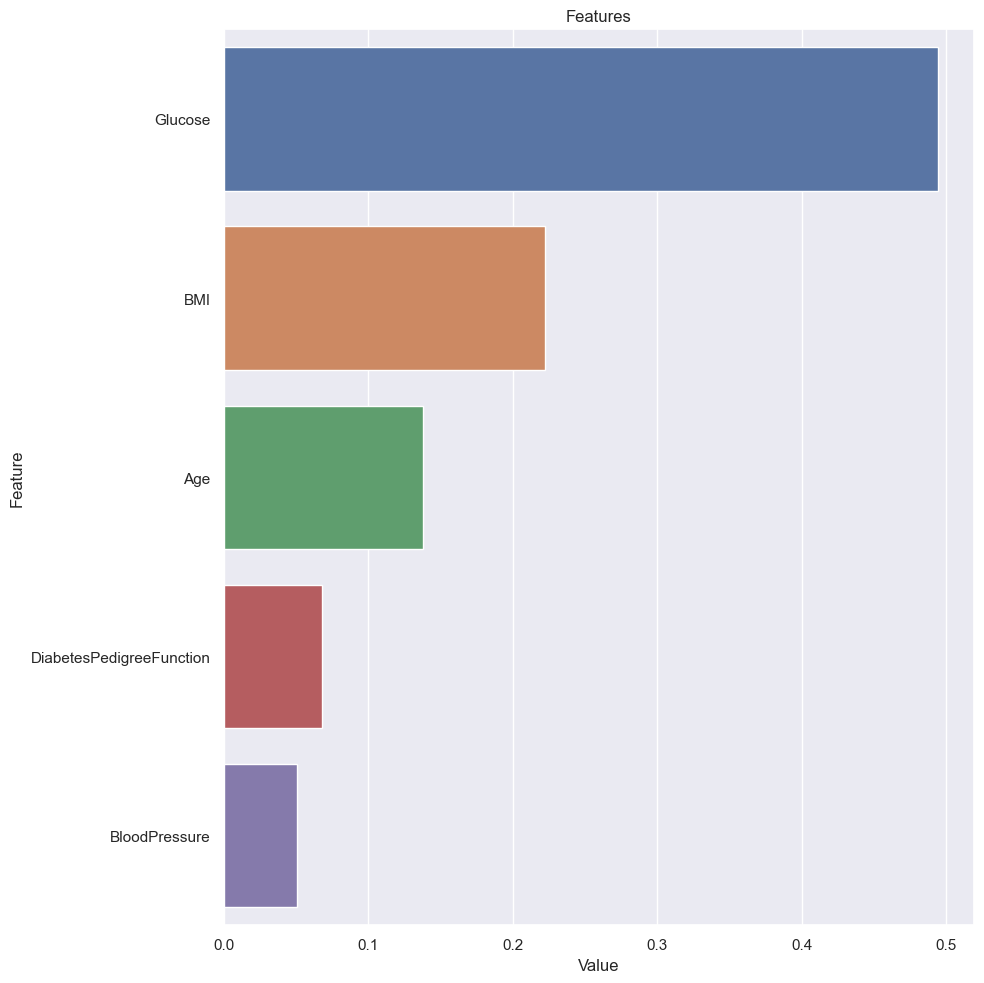

In [61]:
plot_importance(cart_final, X, num=5)

#################################################################
# GÖRSELLEŞTİRME ( Visualization )
#################################################################

In [65]:
import graphviz

ModuleNotFoundError: No module named 'graphviz'

In [ ]:
def tree_graph(model, col_names, file_name):
    tree_str = export_graphviz()